# Importing Dependancies

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
import seaborn as sns
filterwarnings('ignore')

# Cleaning Data

In [2]:
data = pd.read_csv('TaxiFare.csv')
data.head(5)
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])
data['day'] = data['date_time_of_pickup'].dt.day
data['month'] = data['date_time_of_pickup'].dt.month
data['year'] = data['date_time_of_pickup'].dt.year

In [3]:
features = data.drop(columns=['date_time_of_pickup','unique_id','amount'], axis=1)
target = data['amount']
features.sample(5)
features.shape
features

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day,month,year
0,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010
...,...,...,...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013
49996,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015
49997,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011
49998,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012


## Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc.fit(features)

In [5]:
# features=sc.fit_transform(features)
# features = pd.DataFrame(features)
features

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,day,month,year
0,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010
...,...,...,...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013
49996,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015
49997,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011
49998,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012


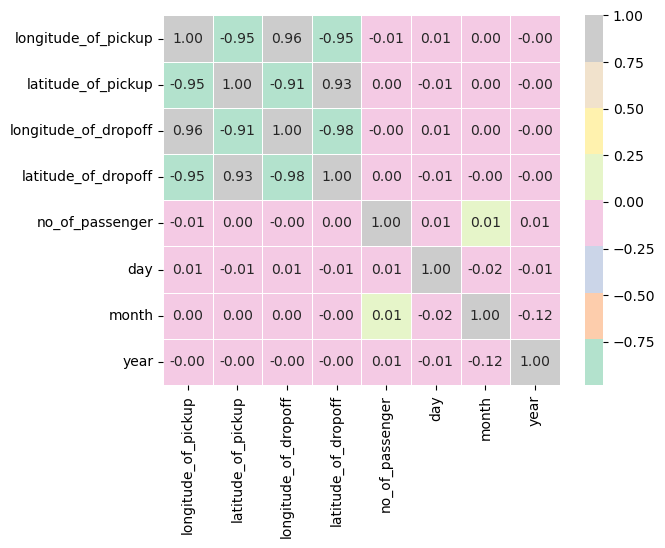

In [6]:
cm = features.corr()
sns.heatmap(cm, linewidths=.64, annot=True, cmap='Pastel2', fmt='.2f')
plt.show()

## Splitting The Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-1, oob_score=True, max_samples=7500, n_estimators= 65, max_depth = 55, max_features=7)

In [9]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=55, max_features=7, max_samples=7500,
                      n_estimators=65, n_jobs=-1, oob_score=True)

## Predicting & Testing Accuracy

In [10]:
y_pred = rfr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error
acc = r2_score(y_test, y_pred) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, y_pred),2)))

Accuracy is 79.41%
Mean Squared Error is 17.8%


## Cross-Validation For Actual Accuracy

In [12]:
# from sklearn.model_selection import cross_val_score
# np.mean(cross_val_score(RandomForestRegressor(),features,target,cv=5,scoring='accuracy'))

In [13]:
print(rfr.feature_importances_)

[0.27794585 0.12275721 0.35170008 0.16821018 0.00856758 0.02589074
 0.0186621  0.02626627]


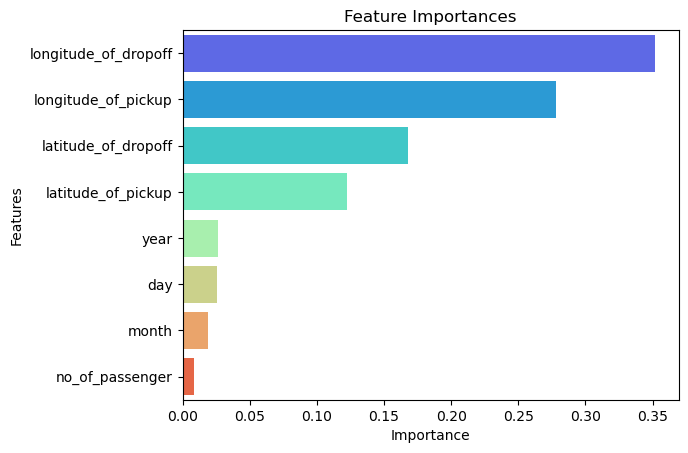

In [14]:
sorted_idx=rfr.feature_importances_.argsort()[::-1]
y_values = list(features.columns[sorted_idx])
sns.barplot(x=rfr.feature_importances_[sorted_idx], y=y_values, palette="rainbow")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [15]:
# from sklearn.model_selection import GridSearchCV
# param_grid= {'max_features': ['auto', 'sqrt'],
#              'max_depth': [1,10],
#              'min_samples_split': [2,5,8,10],
#              'min_samples_leaf': [1, 2, 4, 6],
#              'bootstrap': [True, False]
# }
# grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=20), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)  

In [16]:
# grid_search.fit(X_train,y_train)

In [17]:
# grid_predictions = grid_search.predict(x_test)
# acc = r2_score(y_test, grid_predictions) * 100
# print("Accuracy is {}%".format(round(acc,2)))
# print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, grid_predictions),2)))

In [18]:
# 'from sklearn.model_selection import RandomizedSearchCV
# param_grid= {'max_features': ['auto', 'sqrt'],
#              'max_depth': [None,1,5],
#              'min_samples_split': [2,5,8,10],
#              'min_samples_leaf': [1, 2, 4, 6],
#              'bootstrap': [True, False]
# }
# random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=40), param_distributions=param_grid,
# n_iter = 100, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=40,n_jobs=-1) 